# Predicting diabetes



## Import Libraries


In [1]:
import pandas as pd       
import matplotlib.pyplot as plt 
import numpy as np          


## Load and Review data

In [2]:
df= pd.read_csv('C:\\Users\\Neelesh Mishra\\Desktop\\data\\pima-data.csv')

In [3]:
df.shape

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.isnull().values.any() 

False

In [7]:
df.corr() 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


## plotting correlation function

In [8]:
def corr_plot (df, size=11):
    corr=df.corr()
    fig, ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)  # gives colour representation
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    

In [9]:
corr_plot (df)

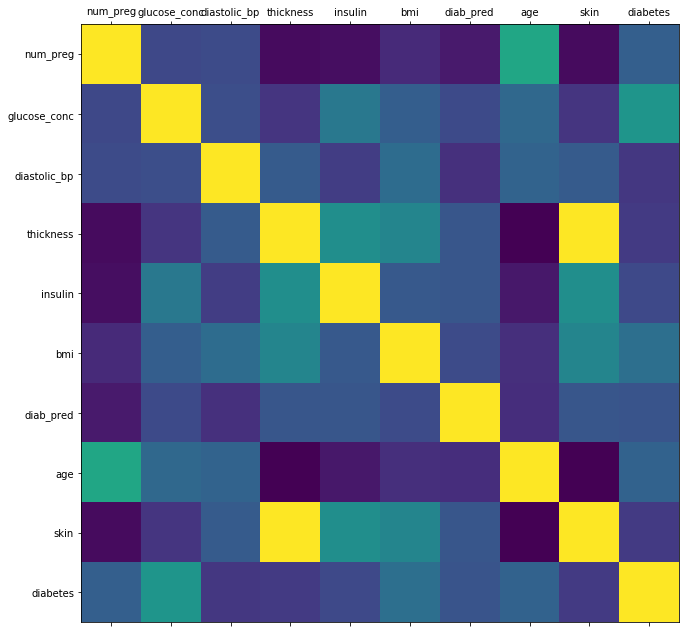

In [10]:
plt.show()

In [11]:
del df['skin']

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Mapping data

In [13]:
diabete_map = {True:1,False:0}

In [14]:
df['diabetes']=df['diabetes'].map(diabete_map)

In [15]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
num_true=len(df.loc[df['diabetes']== True])
num_false=len(df.loc[df['diabetes']== False])

In [17]:
print("Number of true cases = ",num_true)

Number of true cases =  268


In [18]:
print("Number of false cases =",num_false)

Number of false cases = 500


In [19]:
print("Total number of cases = ",num_true+num_false)

Total number of cases =  768


## Splitting data using scikit learn

In [20]:
from sklearn.cross_validation import train_test_split
data_features=['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
data_predictedclass=['diabetes']
x=df[data_features].values
y=df[data_predictedclass].values
split_size=0.3
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_size,random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
len(df.index)

768

In [22]:
print("training set percentage =" ,(len(x_train)/len(df.index))*100)

training set percentage = 69.921875


## To check ratio of diabetes in test and training set 

In [23]:
print("diabetes == true in data = ", (len(df.loc[df['diabetes']==1]))/len(df.index)*100)
print("diabetes == true in training_set = ", (len(y_train[y_train[:]==1]))/len(y_train)*100)
print("diabetes == true in test_set = ", (len(y_test[y_test[:]==1]))/len(y_test)*100)

diabetes == true in data =  34.89583333333333
diabetes == true in training_set =  35.00931098696462
diabetes == true in test_set =  34.63203463203463


## Post splitting

In [24]:
from sklearn.preprocessing import Imputer
fill_0=Imputer(missing_values=0,strategy="mean")
x_train=fill_0.fit_transform(x_train)
x_test=fill_0.fit_transform(x_test)

### Training data set using Naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train,y_train.ravel())
nb_predict_train=nb_model.predict(x_train)
nb_predict_test=nb_model.predict(x_test)
from sklearn import metrics
print("accuracy of train data = ",metrics.accuracy_score(y_train,nb_predict_train) )
nb_predict_test=nb_model.predict(x_test)
print("accuracy of test data = ",metrics.accuracy_score(y_test,nb_predict_test))
print("Checking confusion matrix = \n",metrics.confusion_matrix(y_test,nb_predict_test,labels=[1,0]))
print("Checking classification Report = \n",metrics.classification_report(y_test,nb_predict_test,labels=[1,0]))

accuracy of train data =  0.754189944134
accuracy of test data =  0.735930735931
Checking confusion matrix = 
 [[ 52  28]
 [ 33 118]]
Checking classification Report = 
              precision    recall  f1-score   support

          1       0.61      0.65      0.63        80
          0       0.81      0.78      0.79       151

avg / total       0.74      0.74      0.74       231



### Improving Recall using random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(x_train,y_train.ravel())
rf_train_data=rf_model.predict(x_train)
rf_test_data=rf_model.predict(x_test)
print("Accuracy of train data = ",metrics.accuracy_score(y_train,rf_train_data))
print("Accuracy of test data = ",metrics.accuracy_score(y_test,rf_test_data))
print("Confusion_matrix = \n",metrics.confusion_matrix(y_test,rf_test_data,labels=[1,0]))
print("Classification_report = \n",metrics.classification_report(y_test,rf_test_data,labels=[1,0]))

Accuracy of train data =  0.98696461825
Accuracy of test data =  0.709956709957
Confusion_matrix = 
 [[ 43  37]
 [ 30 121]]
Classification_report = 
              precision    recall  f1-score   support

          1       0.59      0.54      0.56        80
          0       0.77      0.80      0.78       151

avg / total       0.70      0.71      0.71       231



### Poor recall in Random Forest trying Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(C=0.8,random_state=30)
lr_model.fit(x_train,y_train.ravel())
lr_train_data=lr_model.predict(x_train)
lr_test_data=lr_model.predict(x_test)
print("Accuracy of train data = ",metrics.accuracy_score(y_train,lr_train_data))
print("Accuracy of test data = ",metrics.accuracy_score(y_test,lr_test_data))
print("Confusion_matrix of test data = ",metrics.confusion_matrix(y_test,lr_test_data,labels=[1,0]))
print("Confusion_matrix of test data = ",metrics.classification_report(y_test,lr_test_data,labels=[1,0]))

Accuracy of train data =  0.772811918063
Accuracy of test data =  0.753246753247
Confusion_matrix of test data =  [[ 44  36]
 [ 21 130]]
Confusion_matrix of test data =               precision    recall  f1-score   support

          1       0.68      0.55      0.61        80
          0       0.78      0.86      0.82       151

avg / total       0.75      0.75      0.75       231



Best_C_value =  1.4000000000000001


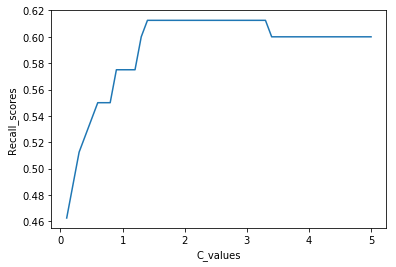

In [28]:
c_start=0.1
c_end=5
c_inc=0.1
c_values,recall_values=[],[]
c_val=c_start
best_recall_score=0
while(c_val<=c_end):
    lr_model=LogisticRegression(C=c_val,random_state=30)
    c_values.append(c_val)
    c_val=c_val+c_inc
    lr_model.fit(x_train,y_train.ravel())
    lr_model_data=lr_model.predict(x_train)
    lr_model_test=lr_model.predict(x_test)
    recall_score=metrics.recall_score(y_test,lr_model_test)
    recall_values.append(recall_score)
    if(recall_score>=best_recall_score):
        best_recall_score=recall_score
    best_c_value=c_values[recall_values.index(best_recall_score)]
%matplotlib inline
plt.plot(c_values,recall_values,'-')
plt.xlabel("C_values")
plt.ylabel("Recall_scores")
print("Best_C_value = ",best_c_value)
    

### using logistic regression with balanced classes

Best_C_value =  0.30000000000000004


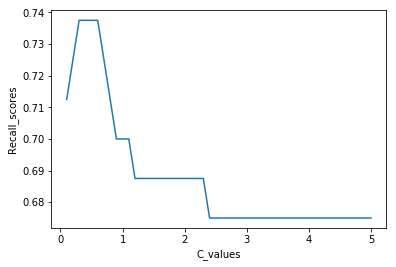

In [31]:
c_start=0.1
c_end=5
c_inc=0.1
c_values,recall_values=[],[]
c_val=c_start
best_recall_score=0
while(c_val<=c_end):
    lr_model=LogisticRegression(C=c_val,class_weight="balanced",random_state=30)
    c_values.append(c_val)
    c_val=c_val+c_inc
    lr_model.fit(x_train,y_train.ravel())
    lr_model_data=lr_model.predict(x_train)
    lr_model_test=lr_model.predict(x_test)
    recall_score=metrics.recall_score(y_test,lr_model_test)
    recall_values.append(recall_score)
    if(recall_score>=best_recall_score):
        best_recall_score=recall_score
    best_c_value=c_values[recall_values.index(best_recall_score)]
%matplotlib inline
plt.plot(c_values,recall_values,'-')
plt.xlabel("C_values")
plt.ylabel("Recall_scores")
print("Best_C_value = ",best_c_value)


### Logistic regression using CV class

In [55]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model=LogisticRegressionCV(random_state=30,Cs=3,cv=10,class_weight="balanced")
lr_cv_model.fit(x_train,y_train.ravel())
predict_train_data=lr_cv_model.predict(x_train)
print("accuracy of train data = ",metrics.accuracy_score(y_train,predict_train_data) )
predict_test_data=lr_cv_model.predict(x_test)
print("accuracy of test data = ",metrics.accuracy_score(y_test,predict_test_data))
print("Checking confusion matrix = \n",metrics.confusion_matrix(y_test,predict_test_data,labels=[1,0]))
print("Checking classification Report = \n",metrics.classification_report(y_test,predict_test_data,labels=[1,0]))

accuracy of train data =  0.769087523277
accuracy of test data =  0.692640692641
Checking confusion matrix = 
 [[ 52  28]
 [ 43 108]]
Checking classification Report = 
              precision    recall  f1-score   support

          1       0.55      0.65      0.59        80
          0       0.79      0.72      0.75       151

avg / total       0.71      0.69      0.70       231

